In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
df = pd.read_csv(r'D:\SEM4\PLLM\tcc_ceds_music.csv')
df.sample(10)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
27369,80706,jakob ogawa,velvet light,2018,rock,mind fade pink cashmere summer nights summer n...,22,0.002506,0.002506,0.002506,...,0.419822,0.037206,0.658832,0.644412,0.753012,0.136640,0.504328,0.419401,sadness,0.028571
26302,77846,the killers,"andy, you're a star",2004,rock,field remember incredible shut shut yeah field...,49,0.001284,0.434690,0.168126,...,0.001284,0.001284,0.469295,0.805656,0.228915,0.004109,0.675392,0.604592,violence,0.228571
2325,6969,wings,with a little luck,1978,pop,little luck help damn thing work little feel e...,151,0.007842,0.000384,0.000384,...,0.000384,0.383363,0.636088,0.518063,0.072389,0.000176,0.258038,0.370351,feelings,0.600000
20415,62047,diablo swing orchestra,voodoo mon amour,2012,jazz,insert needle break stand fall consider bewild...,58,0.095308,0.005263,0.005263,...,0.475272,0.005263,0.549442,0.855909,0.000740,0.599190,0.356966,0.983983,sadness,0.114286
10154,29799,emmylou harris,gulf coast highway (with willie nelson),1990,country,gulf coast highway work rail work field cold d...,92,0.000741,0.000741,0.022941,...,0.101667,0.000741,0.528864,0.601826,0.747992,0.000000,0.315746,0.239215,music,0.428571
24074,72423,carpenters,love me for what i am,1975,rock,fell night regret ordinary problems hard face ...,22,0.003509,0.003509,0.228449,...,0.329734,0.003509,0.325246,0.524088,0.869478,0.000000,0.248763,0.181156,sadness,0.642857
16045,51210,gary moore,trouble ain't far behind,2008,blues,break heart break days know suppose trouble mi...,32,0.001754,0.001754,0.142410,...,0.316895,0.001754,0.485541,0.735405,0.274096,0.006609,0.129225,0.343323,sadness,0.171429
23163,69526,the expanders,hustling culture,2015,reggae,check victim crime check rhythm rhyme legends ...,140,0.000702,0.300751,0.135270,...,0.139421,0.000702,0.756309,0.763916,0.015862,0.000012,0.942292,0.839835,violence,0.071429
25097,75093,van halen,mine all mine,1988,rock,forgive father sin hell shake hand devil look ...,75,0.024123,0.307405,0.101597,...,0.000892,0.046252,0.539695,0.584570,0.011646,0.010020,0.767106,0.873870,violence,0.457143
8147,23078,dillard & clark,git it on brother,1968,country,listen sinner want someday come know wrong rig...,74,0.000786,0.000786,0.000786,...,0.000786,0.048203,0.525615,0.596698,0.302208,0.000000,0.904163,0.544530,music,0.742857


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [72]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [73]:
df = df[['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len']]
df.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48


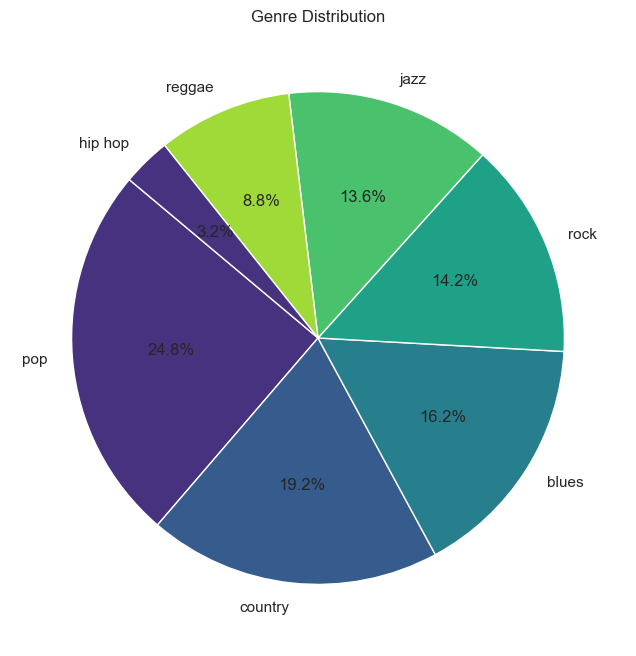

In [86]:
# Genre
genre_count = df['genre'].value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis")
sns.set(style='whitegrid')
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%',colors = colors,startangle=140)
plt.title('Genre Distribution')
plt.show()

In [84]:
print(len(date_count))
print(len(date_count.index))


70
70


### **Tokenization**

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lyrics_tokenization(df):
    def preprocess_text(text):
        if isinstance(text, str):
            tokens = word_tokenize(text)
            filtered_tokens = [word for word in tokens if word.isalpha()]
            filtered_tokens = [word.lower() for word in filtered_tokens if word.lower() not in stop_words]
            lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
            return lemmatized_tokens
        elif isinstance(text, list):
            # If already tokenized, apply only lemmatization and stopword removal
            filtered_tokens = [word for word in text if word.isalpha() and word.lower() not in stop_words]
            lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
            return lemmatized_tokens
        else:
            return []

    # Apply preprocessing
    df['lyrics'] = df['lyrics'].apply(preprocess_text)
    
    return df

### **Word2Vec**
Word2Vec Encoding:

Word2Vec creates dense word vectors that capture semantic meaning. Words that appear in similar contexts have similar vectors.

- The vector_size parameter specifies the dimensionality of the word vectors.
- The method averages the vectors of all words in a song to get a single vector representation for the lyrics.

In [ ]:
from gensim.models import Word2Vec

In [ ]:

def train_word2vec_and_encode(df):
    df['tokenized_lyrics'] = df['lyrics']
    
    model = Word2Vec(sentences=df['tokenized_lyrics'], vector_size=100, window=5, min_count=1, workers=4)
    
    # Function to get average vector for a list of words
    def get_avg_vector(words):
        vectors = [model.wv[word] for word in words if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    
    # Apply function to get average vectors
    df['lyrics_vector'] = df['tokenized_lyrics'].apply(get_avg_vector)
    
    # Drop the intermediate tokenized_lyrics column if no longer needed
    df.drop(columns=['tokenized_lyrics'], inplace=True)
    
    return df


In [ ]:
df = lyrics_tokenization(df)

df = train_word2vec_and_encode(df)

df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,lyrics_vector
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,"[hold, time, feel, break, feel, untrue, convin...",95,"[0.7634499, 0.042387486, -0.57358557, -0.00702..."
1,4,frankie laine,i believe,1950,pop,"[believe, drop, rain, fall, grow, believe, dar...",51,"[0.25006732, 0.61452746, -0.28334612, 0.107968..."
2,6,johnnie ray,cry,1950,pop,"[sweetheart, send, letter, goodbye, secret, fe...",24,"[0.5483387, 0.605366, -0.708178, 0.26797187, 0..."
3,10,pérez prado,patricia,1950,pop,"[kiss, lip, want, stroll, charm, mambo, chacha...",54,"[0.23726343, 0.25368127, -0.40410614, 0.422774..."
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,"[till, darling, till, matter, know, till, drea...",48,"[0.33380994, 0.18107766, -0.6384874, 0.3705339..."


### ***Bert Tokenizer***

In [ ]:
from transformers import DistilBertTokenizer
import pandas as pd

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


data = {'lyrics': ["Hello world!", "This is a test.", "How are you?"]}
df = pd.DataFrame(data)

# Tokenize and encode
def tokenize_and_encode(text_list, tokenizer):
    # Ensure input is a list of strings
    if not all(isinstance(text, str) for text in text_list):
        raise ValueError("All elements in text_list must be strings")
    encoding = tokenizer(text_list, truncation=True, padding=True, return_tensors='pt')
    return encoding


encoded_data = tokenize_and_encode(df['lyrics'].tolist(), tokenizer)

# Check encoded data
print("Input IDs:")
print(encoded_data['input_ids'])

print("\nAttention Mask:")
print(encoded_data['attention_mask'])


Input IDs:
tensor([[ 101, 7592, 2088,  999,  102,    0,    0],
        [ 101, 2023, 2003, 1037, 3231, 1012,  102],
        [ 101, 2129, 2024, 2017, 1029,  102,    0]])

Attention Mask:
tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0]])
